# <span style="color:blue"> <center>Student / TD5 : 4TPU279U $-$ Bachelor 1st year $-$ spring 2023</center></span>
# <center>Introduction to python programming</center>
# <hr style="border:1px solid black"><center>  Integration of movement equations </center><hr style="border:1px solid black">
</br>

<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot </div>


The following topics will be cover in this notebook:
- Equations de la dynamique pour un mouvement plan
- Champs gravitationnel et mouvement circulaire uniforme 
- Champs gravitationnel et mouvement elliptique

<hr style="border:1px solid grey">

### <hr style="border:1px solid black">  Equations de la dynamique pour un mouvement plan <hr style="border:1px solid black">

L'objectif ici est de  construire les trajectoires de points matériels soumis à diverses forces (ressort, poids, frottement, gravité) de façon numérique, c'est-à-dire sans résoudre analytiquement des équations différentielles de la dynamique :

$$\begin{align}
\vec f &=m \vec a =m \frac {d \vec v}{dt}\quad\quad\textcolor{green}{(8)}\\
\vec v &= \frac {d \vec r}{dt}
\end{align}$$

avec $\vec{v}$ le vecteur vitesse de coordonnées $(v_x,v_y,v_z)$ et $\vec{r}$ le vecteur position de coordonnées $(x,y,z)$. A partir de la méthode d'Euler, cf. ***équation*** $\textcolor{green}{(6)}$, le calcul de $\vec{v}$ et $\vec{r}$ peut s'obtenir par récurrence suivant :

$$\begin{align}
\vec{r}(t_{i+1}) &= \vec{r}(t_i) + h\ \vec{v}(t_i)\\
\vec{v}(t_{i+1}) &= \vec{v}(t_i) + \frac{h}{m}\vec{f}(t_i)
\end{align}$$

avec $h=t_{i+1}-t_{i}$ le pas d'intégration des équations du mouvement. Dans le cas de mouvements  plans, 
on a :


$$\begin{align}
  \vec{r}= & \begin{pmatrix}
           x \\
           y \\
           0 \\
         \end{pmatrix},\quad
  \vec{v}=  \begin{pmatrix}
           v_x \\
           v_y \\
           0 \\
         \end{pmatrix},\quad
  \vec{f}=  \begin{pmatrix}
           f_x \\
           f_y \\
           0 \\
         \end{pmatrix}
  \end{align}$$ 

A partir de d'intégration numérique des équations du mouvement traité dans le TD 4, plus particulièrement 
de l'algorithme de Hooke-Newton, on obtient les 2 relations de récurrence suivantes pour la position : 

$$\begin{align}
x(t_{i+1})   &= x(t_i) + h\;v_x(t_i)\\ 
y(t_{i+1})   &= y(t_i) + h\;v_y(t_i)\\ 
\end{align}$$

et 2 relations pour la vitesse :

$$\begin{align}
v_x(t_{i+1}) &= v_x(t_i)+\frac{h}m f_x\left(x(t_{i+1}),y(t_{i+1})\right) \\ 
v_y(t_{i+1}) &= v_y(t_i)+\frac{h}m f_y\left(x(t_{i+1}),y(t_{i+1})\right) \\ 
\end{align}$$

### <hr style="border:1px solid black">  Champs gravitationnel et mouvement circulaire uniforme <hr style="border:1px solid black">

> On souhaite étudier le mouvement d'un objet de masse $m$ en orbite autour du soleil et soumis à la force gravitationnelle de Newton :
$$\vec f=-G\frac{Mm}{r^3}\vec r\quad\quad\textcolor{green}{(1)}$$
avec $G$ la constante gravitationnelle ($m^3kg^{-1}s^{-2}$) et $M$ la masse du soleil.
On prendra comme unité de temps une année $T$ et comme unité de distance l'unité astronomique (ua), avec 1 ua = distance terre - soleil (m). Dans ce sytème d'unité :
$$\vec f=-\frac{km}{r^3}\vec r  \quad\text{avec}\quad k=\frac{GM}{\text{ua}^3}T^2\simeq (2\pi)^2$$

On fait un changement d'unité. G utilise le metre m, mais on veux utiliser ua, donc on défini la constant et on multiplie par la constante de conversion $(1/ua)^3$

##### Exercise 5.1 : constante de Gauss <hr style="border:1px solid grey">

Démontrer numériquement que $\sqrt{k}\simeq 2\pi$. On utilisera les constantes physiques `gravitational_constant` (ou `G`) et `astronomical_unit` (ou `au`) de la librairie `scipy.constants` avec la masse du soleil $M=1.9884\times 10^{30}$ kg.

In [1]:
from scipy.constants import au, G, pi
from scipy.constants import Julian_year as T
import numpy as np

M = 1.9884e30 #kg
k = (G*M)/(au**3)*T**2
print(f"k: {k}, $(2\pi)^2$: {(2*pi)**2}")

k: 39.47673044083979, $(2\pi)^2$: 39.47841760435743


<hr style="border:1px solid grey">

> Pour avoir une trajectoire circulaire, on prendra des conditions initiales telles que :
$$Ec=\frac{|Ep|}2=\frac 12 \frac{km}{r}=\frac 12 \frac{(2\pi)^2m}r$$
avec, pour $m=1$ kg : $r_0=1$ ua et $v_0=2\pi$ ua/année. 



##### Exercise 5.2 : orbite circulaire <hr style="border:1px solid grey">

1. Utiliser l'algorithme de Hook-Newton pour simuler la trajectoire de l'objet autour du soleil.
- On discrétisera $t$ sur une année avec un pas $h=0.01$, ie. $t\in[t_\text{min},t_\text{max}]$ avec
$t_\text{min} = 0$ et $t_\text{max} = 1$
- Les composantes de la positions $(x_0,y_0)=(1,0)$
- Les composantes de la vitesse initiale seront $(v^0_x,v^0_y)=(0,2\pi)$
- Les composantes de la force $(f_x(t),f_y(t))$ sont données par
$$f_x\left(x,y\right)=-\frac{km}{r^3}x\quad\mathrm{et}\quad f_y\left(x,y\right)=-\frac{km}{r^3}y\quad\mathrm{avec}\quad r=\sqrt{\left(x^2+y^2\right)}$$
On écrira 2 fonctions `fx`et `fy` à cet effet. 

In [2]:
from numpy import arange, pi
import numpy as np

m   = 1

x0  = 1.0
y0  = 0.0

# orbite circulaire
vx0 = 0.0
vy0 = 2.5*pi#2.*pi
tmin = 0.0
tmax = 10

h    = 0.001
t    = np.arange(tmin,tmax+h,h)

In [3]:
from numpy import pi, arange, zeros, sqrt

def distance(x, y):
    return np.sqrt(x**2 + y**2)

def fx(x, y):
    r = distance(x, y)
    return -(k*m*x)/r**3

def fy(x, y):
    r = distance(x, y)
    return -(k*m*y)/r**3

2. Représenter graphiquement la variation de $v_x$ et $v_y$ en fonction du temps et comparer aux solutions anaytiques $v_x(t) = -r\omega_0\sin(\omega_0 t)$ et $v_x(t) = +r\omega_0\cos(\omega_0 t)$ avec $w = v_0/r_0 $

In [4]:
import matplotlib.pylab as plt
from numpy import cos, sin

x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = x0
y[0] = y0

vx = np.zeros(len(t))
vy = np.zeros(len(t))
vx[0] = vx0
vy[0] = vy0

for i in range(len(t)-1):
    x[i+1] = x[i] + h*vx[i]
    y[i+1] = y[i] + h*vy[i]

    vx[i+1] = vx[i] + (h/m)*fx(x[i+1], y[i+1])
    vy[i+1] = vy[i] + (h/m)*fy(x[i+1], y[i+1])

3. Représenter graphiquement la trajectoire $(x(t),y(t))$ et les conditions initiales $(x_0(t),y_0(t))$. Ajouter un cercle de rayon r = 1 ainsi qu'un marker décrivant la position du soleil.

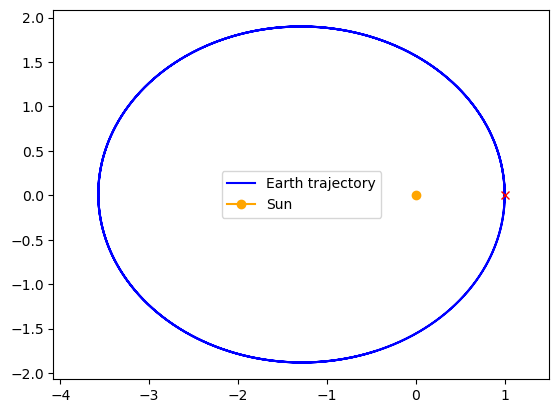

In [5]:
import matplotlib.pylab as plt
from numpy import linspace

c = np.linspace(0, 2*pi, 1000) 
x_circle = np.sin(c)
y_circle = np.cos(c)

#plt.plot(x_circle, y_circle)


plt.plot(x, y, color="b", label="Earth trajectory")
plt.plot(x0, y0, marker="x", color="r")
plt.plot(0,0,marker='o', color="orange", label="Sun")
plt.axis("equal")
plt.legend()




4. Représenter graphiquement $x$, $y$ et $r=\sqrt{x^2+y^2}$ en fonction de $t$.

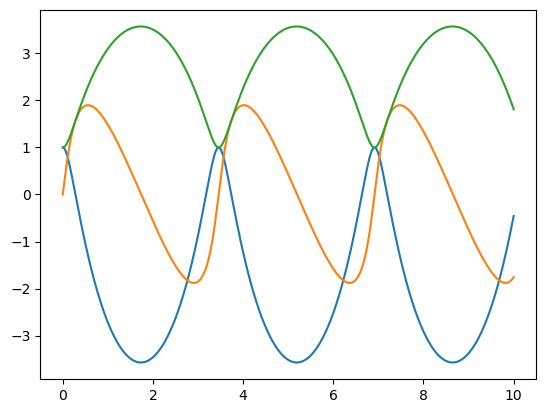

In [6]:
plt.plot(t, x)
plt.plot(t, y)
plt.plot(t, distance(x, y))

5. Représenter graphiquement $v_x$, $v_y$ et $v=\sqrt{v_x^2+v_y^2}$ en fonction de $t$. Calculer la valeur moyenne temporelle de $v$ et son écart-type. Que ce passera t-il si on réduit le pas de temps $h$ et que l'on recommence la simulation ?

v mean: 3.700920315470259, std: 1.6043176488888102


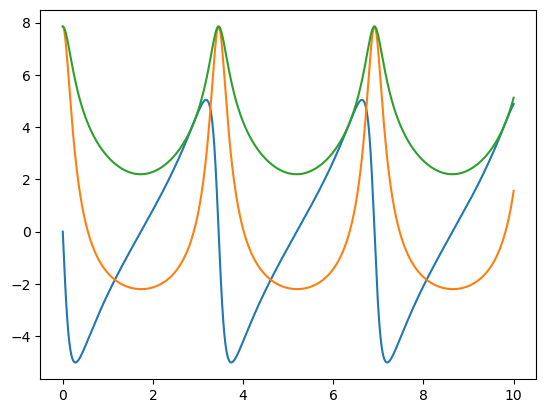

In [7]:
from numpy import mean, std

v = distance(vx, vy)

plt.plot(t, vx)
plt.plot(t, vy)
plt.plot(t, v)

print(f"v mean: {np.mean(v)}, std: {np.std(v)}")


6. Représenter graphiquement l'énergie potentielle $E_p$, l'énergie cinétique $E_c$, et l'énergie totale $E=E_p+E_c$ en fonction de $t$, avec : $$E_p = -\frac{km}{r}\quad\text{et}\quad E_c =\frac{1}{2}mv^2$$

In [8]:
Ep = -k*m/distance(x, y)
Ec = 1/2*m*v**2

7. Calculer les moyennes temporelles $\langle E_p\rangle$, $\langle E_c\rangle$ et montrer que $\langle E_p\rangle/\langle E_c\rangle=-2$.

In [9]:
Ep_mean = np.mean(Ep)
Ec_mean = np.mean(Ec)

print(f"<Ep>/<Ec> = {Ep_mean/Ec_mean}")

<Ep>/<Ec> = -2.0613906048843598


 <hr style="border:1px solid grey">

### <hr style="border:1px solid black">  Champs gravitationnel et mouvement elliptique <hr style="border:1px solid black">

Avec un repère centré sur le foyer, l'équation en coordonnée polaire d'une l'ellipse est donnée par :
$$r(\theta) = \frac{(a-c)(a+c)}{a-c\cos(\theta)}\quad\textcolor{green}{(2)}$$
avec 
- $a$ le demi-grand axe correspondant au diamètre de longueur maximale de l'ellipse
- $c$ la distance entre le foyer et le centre de l'ellipse

> Calcul du rayon $r$ de l'ellipse en fonction de $\theta$ pour une période de révolution complète, ie. $\theta=[0,2\pi]$ avec $a=3$ et $c=2$ ua.

In [10]:
from numpy import linspace, pi, cos

a = 3.0
c = 2.0
theta = np.linspace(0,2*pi,256)
r = (a - c)*(a + c)/(a - c*np.cos(theta))

> Représentation graphique d'une ellipse en coordonnées polaires

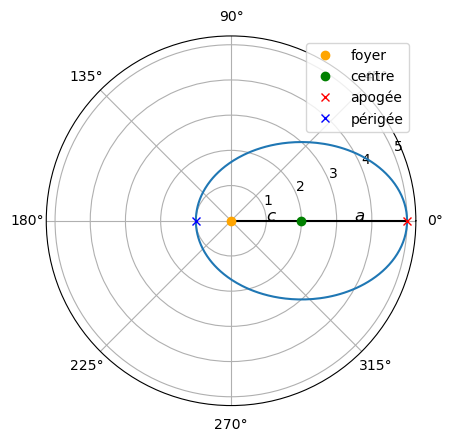

In [11]:
import matplotlib.pylab as plt

# Représentation de l'orbite
plt.polar(theta,r)

# Représentation de la distance a
plt.polar([0,0],[c,c+a],marker='',color='black')
plt.text(-0.0,c+a/2,'$a$',fontsize=12)

# Représentation de la distance c
plt.polar([0,0],[0,c],marker='',color='black')
plt.text(-0.0,c/2,'$c$',fontsize=12)

# Localisation du foyer de l'ellipse
plt.polar(0,0,marker='o', color='orange',label='foyer', linestyle='')

# Localisation du centre de l'ellipse
plt.polar(0,c,marker='o', color='green', label='centre',linestyle='')

# Localisation de l'apogée
plt.polar(0,c+a ,marker='x',color='red', label='apogée', linestyle='')

# Localisation du périgée
plt.polar(pi,a-c,marker='x',color='blue',label='périgée',linestyle='')

plt.legend()

Remarques :
- Le ***périgée*** correspond au point de l'orbite le plus proche du foyer. La distance périgée-foyer sera notée $d_{\text{min}}$.
- L'***apogée*** correspond au point de l'orbite le plus éloigné du foyer. La distance apogée-foyer sera noté $d_{\text{max}}$.

##### Exercise 5.3 : première loi de Kepler <hr style="border:1px solid grey">

Reprendre l'***Exercise 5.2*** avec les conditions suivantes :
- On discrétisera $t$ sur 4 années avec un pas $h=0.001$
- Les composantes de la positions $(x_0,y_0)=(1,0)$
- Les composantes de la vitesse initiale seront selectionnées de telle sorte que 
$$\frac{|Ep|}2<Ec<|Ep|$$ 
soit $r_0=1$ et $2\pi <v_0 <\sqrt 8\pi$. Par exemple : $(v^0_x,v^0_y)=(0,2.5\pi)$.

Comparer les résultats avec ceux obtenu pour l'orbite circulaire. Et vérifier visuellement la première loi de Kepler : *Les planètes tournent autour du Soleil en suivant des orbites en forme d'ellipse dont le Soleil occupe un des foyers.*

<hr style="border:1px solid grey">

##### Exercise 5.4 : troisième loi de Kepler  <hr style="border:1px solid grey">

1. Ecrire un algorithme permettant de calculer la distance maximum $d_{\text{max}}$ entre le foyer (= le soleil) et l'ellipse.

In [12]:
dmax = max(r)
print(f"d max: {dmax}")

d max: 5.0


2. Ecrire un algorithme permettant de calculer la distance minimum $d_{\text{min}}$ entre le foyer et l'ellipse.

In [13]:
dmin = min(r)
print(f"d min: {dmin}")

d min: 1.0000303568755797


3. En utilisant $d_{\text{min}}$ et $d_{\text{min}}$ calculer la longueur du demi-grand axe $a$ de l'ellipse.

<span style="color:red">**solution :**</span>

In [14]:
a = (d_max + d_min)/2
print('a = %12.8f au'%a)

NameError: name 'd_max' is not defined

4. A partir de La troisième loi de Kepler qui relit la période $P$ de l'orbite au demi-grand axe par
$a^3/P^2=k$, calculer $P$.

5. En utilisant la valeur de la période $P$ pour discrétiser le temps, c'est-à-dire, $t\in[0,P]$, tout en conservant les conditions initiales précédente reprendre l'***Exercise 5.3***. Pourquoi le théorème du viriel est de nouveau vérifié ?

<hr style="border:1px solid grey">

> La deuxième loi de Kepler stipule que le rayon vecteur planète-Soleil balaie des aires égales en des temps égaux. Cette loi peut sécrire de la manière suivante :
$$A(\Delta t)=\frac{||\vec{L}||}{2m}\Delta t=\frac{1}{2}\int^{t_1}_{t_0}r^2(t)\dot\theta(t)dt\quad\textcolor{green}{(3)}$$
avec $\vec{L}$ le moment cinétique orbital de l'objet de masse $m$ et $\Delta t = t_1 -t_0$.

>Pour vérifier cet énoncé nous devons calculer la vitesse angulaire $\dot\theta(t)={d\theta}/{dt}$ à chaque instant $t$, puis réaliser l'intégration de l'***équation*** $\textcolor{green}{(3)}$ numériquement.

##### Exercise 5.6 : deuxième loi de Kepler

1. Répresenter sur un graphique l'ellipse numérique ainsi que les 4 vecteurs $(r_0,r_1,r_2,r_3)$ associée aux temps $t_0=0$, $t_1=P/16$, $t_2=P/2$ et $t_3=7P/16$ 

1. Entre l'apogée et le périgée, calculer $\theta(t)$ à partir des coordonnées $x$ et $y$ et représenter les résultats.

1. En utilisant l'approximation des différences finies *centrées* calculer $\dot\theta(t)$. Les valeurs de $\dot\theta(t_0)$ et $\dot\theta(t_\text{max})$ seront calculées à l'aide des différences finies *progressives*.

1. Intégrer $r^2d\dot\theta$ entre $t_0=0$ et $t_1=P/16$. Comparer à l'intégrale obtenue pour $t_2=P/2$ et $t_3=7P/16$.